<a href="https://colab.research.google.com/github/IEXE-Tec/analisis_de_algoritmos/blob/main/01_analisis_de_algoritmos_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de Algoritmos I

# Complejidad

## Ejercicio Perimetro Cuadrado

In [1]:
import timeit
import time
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(16,6)})

Alumno I

In [2]:
def per_cuadrado_i(lado=0):
  perimetro = 0
  for l in range(0,4):
    perimetro += lado

  return perimetro

Alumno II

In [3]:
def per_cuadrado_ii(lado=0):
  return lado*4

In [4]:
%time per_cuadrado_i(1)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 11.2 µs


4

In [5]:
%time per_cuadrado_ii(1)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.58 µs


4

## Ejercicio 2
Perimetro 

In [6]:
def perimetro_i(l=0, n=0):
  per = 0
  for i in range(0,n):
    per += l

  return per

In [7]:
def perimetro_ii(l=0, n=0):
  return l*n

In [8]:
%time perimetro_i(l=1, n=1000000)

CPU times: user 103 ms, sys: 636 µs, total: 104 ms
Wall time: 157 ms


1000000

In [9]:
%time perimetro_ii(l=1, n=1000000)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.3 µs


1000000

### Tiempo en funcion de n

Ahora grafiquemos el tiempo de ejecucion dependiendo del parametro n.

In [10]:
def tiempo_exc(foo, n=0,l=0):
  '''
  foo: funcion a evaluar (perimetro_ii o  i
  n: numero de lados
  l: tamaño del lado

  return: wall time 
  '''
  start_time = time.time()
  foo(n,l)
  end_time = time.time()
  return end_time - start_time

In [11]:
tiempo_i = []
tiempo_ii = []
lista_n = list(range(1, 1000001, 10000))

# Medir tiempos de ejecucion
for nn in lista_n:
  tiempo_i.append(tiempo_exc(perimetro_i, n=nn, l=1))
  tiempo_ii.append(tiempo_exc(perimetro_ii, n=nn, l=1))

# Crear dataframe
df_i = pd.DataFrame({'n':lista_n, 'tiempo':tiempo_i})
df_i['alg'] = 'i'
df_ii = pd.DataFrame({'n':lista_n, 'tiempo':tiempo_ii})
df_ii['alg'] = 'ii'
df = pd.concat([df_i, df_ii], ignore_index=True)
df

,n,tiempo,alg
0,1,3.337860e-06,i
1,10001,1.192093e-06,i
2,20001,9.536743e-07,i
3,30001,7.152557e-07,i
4,40001,9.536743e-07,i
...,...,...,...
195,950001,4.768372e-07,ii
196,960001,4.768372e-07,ii
197,970001,2.384186e-07,ii
198,980001,4.768372e-07,ii


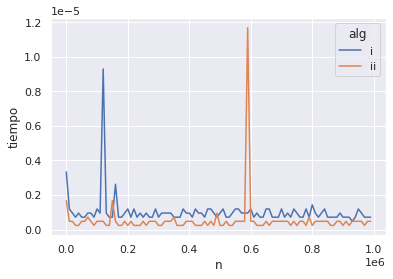

In [12]:
sns.lineplot(data=df, x='n', y='tiempo', hue='alg')

In [13]:
# Varias ejecuciones para los mismos valores de n


for h in range(10000):
  tiempo_i = []
  tiempo_ii = []
  lista_n = list(range(1, 1000000, 1000))
  lista_df = []
  for nn in lista_n:
    tiempo_i.append(tiempo_exc(perimetro_i, n=nn, l=1))
    tiempo_ii.append(tiempo_exc(perimetro_ii, n=nn, l=1))

  # Crear dataframe
  df_i = pd.DataFrame({'n':lista_n, 'tiempo':tiempo_i})
  df_i['alg'] = 'i'
  df_ii = pd.DataFrame({'n':lista_n, 'tiempo':tiempo_ii})
  df_ii['alg'] = 'ii'
  df = pd.concat([df_i, df_ii], ignore_index=True)
  lista_df.append(df)

df = pd.concat(lista_df, ignore_index=True)
df = df.groupby(['n', 'alg'], as_index=False).mean()
df.head()

,n,alg,tiempo
0,1,i,3.576279e-06
1,1,ii,1.192093e-06
2,1001,i,1.668930e-06
3,1001,ii,7.152557e-07
4,2001,i,1.430511e-06


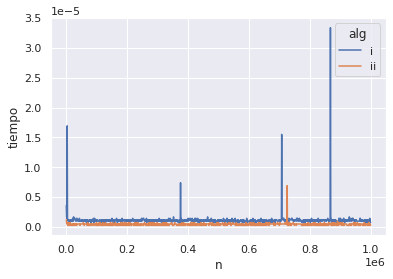

In [14]:
sns.lineplot(data=df, x='n', y='tiempo', hue='alg')

# Notacion Big-O

Veamos algunos ejemplo de la complejidad de algunas funciones aplicada a la lista con valores 1 a n:   
 
```datos=list(range(1, n+1)) ```

In [15]:
def foo_datos(n=10):
  return list(range(1, n+1))

In [16]:
datos = foo_datos(n=10)
datos

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## Funcion Constante  
$\mathcal{O}(1)$, pues sin importar el tamaño de la lista de valores, el codigo es ejecutado en 1 un paso.

In [17]:
def o_constante(datos):
  print(datos)

In [18]:
o_constante(datos)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## Funcion lineal
$\mathcal{O}(n)$

En el siguiente bloque el tiempo es lineal en $n$ pues se ejecuta una operacion de suma en cada iteracion del for-loop `for s in datos`.

In [19]:
def o_lineal_suma(datos):
  suma = 0
  for s in datos:
    suma += s

  return suma

In [20]:
o_lineal_suma(datos)

55

Lo mismo pasa en el siguiente bloque. Cada operacion de print o imprimir es ejecutada $n$ veces por eso la complejidad $\mathcal{O}(n)$.

In [21]:
def o_lineal_print(datos):
  for s in datos:
    print(s)

In [22]:
o_lineal_print(datos)

1
2
3
4
5
6
7
8
9
10


## Polinomial de grado 2

$\mathcal{O}(n^2)$

En el siguiente ejemplo la complejidad es polinomial de grado dos, o cuadrada. Pues a cada uno de los $n$ elementos de la lista de le multiplica con cada uno de los $n$ elementos de la misma lista. 
Se crea la variable `acc` en un primer paso. Esto se hace en $\mathcal{O}(1)$.   

Podemos observar que el primer for `for s in datos` itera sobre cada uno de los `n` valores guardatos en `datos`.  
A su vez, tiene otro for anidado `for ss in datos` que itera sobre la misma lista de $n$ objetos.  
 En cada una de estas operaciones se realiza una suma y una multiplicacion `acc += s*ss`.

Esto nos da $2n^2$ operaciones en los loops de la funcion, lo que significa que tiene una complejidad de $ \mathcal{O}(n^2) $.

In [23]:
def o_cuadratica_mult(datos):
  acc = 0
  for s in datos:
    for ss in datos:
      acc += s*ss
  return acc

In [24]:
o_cuadratica_mult(datos)

3025

## Tarea

Encuntra al complejidad asitotica de las siguientes funciones

In [25]:
def o_tarea_1(datos):
  for s in datos:
    print(s)
    pass 

In [26]:
o_tarea_1(datos)

1
2
3
4
5
6
7
8
9
10


In [27]:
def o_tarea_2(datos):
  for s in datos:
    pass 

In [28]:
o_tarea_2(datos)

In [29]:
def o_tarea_3(datos):
  return 0

In [30]:
o_tarea_3(datos)

0

In [31]:
def o_tarea_4(datos):
  acc = 0
  for s in datos:
    for ss in datos:
      for sss in datos:
        acc = acc*sss
        acc -= sss
        acc += sss
  return acc

In [32]:
o_tarea_4(datos)

0

In [33]:
def o_tarea_5(datos):
  acc = 0
  for s in datos:
    for ss in range(1,5):
      acc += s*ss
  return acc

In [34]:
o_tarea_5(datos)

550

# Estructuras de Datos basicas en python

En esta[wiki de python](https://wiki.python.org/moin/TimeComplexity) encontraras las tablas con la complejidad de diversas operaciones de python en notacion Big-O. Es un recurso invaluable para hacer tu codigo mas eficiente.


## Listas

In [35]:
# Creacion de Listas
lista = []
lista = list()

### Guardar o asignar

In [37]:
def append(n=0):
  l = []
  for i in range(0,n):
    l.append(i)

def concat(n=0):
  l = []
  for i in range(0,n):
    l = l + [i]

def comprehension(n=0):
  l = [i for i in range(0,n)]

def range_list(n=0):
  l = list(range(0,n))

def range_iterable(n=0):
  l = range(0,n)

In [42]:
N = int(1e3)
print('Append')
%timeit append(N)
print('Concat')
%timeit concat(N)
print('Comprehension')
%timeit comprehension(N)
print('Range List')
%timeit range_list(N)
print('range Iterable')
%timeit range_iterable(N)





Append
10000 loops, best of 5: 78.8 µs per loop
Concat
1000 loops, best of 5: 1.12 ms per loop
Comprehension
10000 loops, best of 5: 37.3 µs per loop
Range List
100000 loops, best of 5: 14.3 µs per loop
range Iterable
The slowest run took 8.06 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 354 ns per loop


Aqui se encuentra la lista con el costo de las operaciones para las listas en python:
+ n: es el numero de elementos en la lista
+ k: parametro de la operacion. Por ejemplo del slice, es el numero de objetos al que vamos a acceder.  
[Fuente](https://wiki.python.org/moin/TimeComplexity)

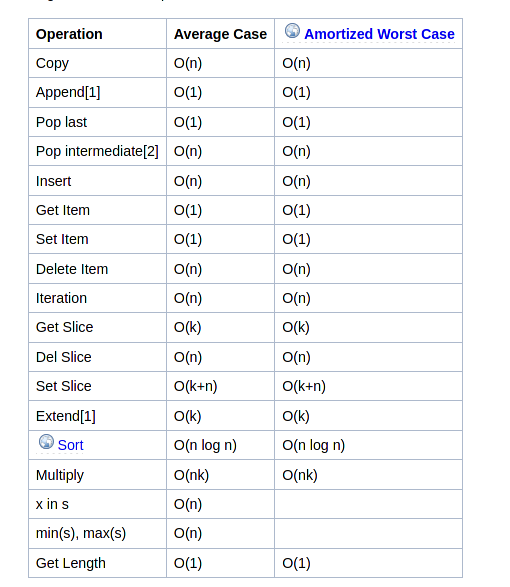

Los terminos [average case](https://en.wikipedia.org/wiki/Average-case_complexity) y [amortized worst case](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_amortizaci%C3%B3n) nos quedaran claros mas adelante. Por ahora podemos interpretarlos como:  
+ Average Case: (Caso promedio) Es la complejidad para un caso tipico o promedio, no es el peor ni el mejor.
+ Amortized Worst Case: (Peor caso amortizado) Es el promedio en el tiempo de ejecucion por mas de una operacion en el peor de los casos.